In [81]:
import pandas as pd
import numpy as np
import os
from gtda.time_series import TakensEmbedding, SingleTakensEmbedding, SlidingWindow
from sklearn.preprocessing import StandardScaler
from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_point_cloud
from gtda.diagrams import PersistenceLandscape, BettiCurve, HeatKernel, PersistenceImage, Silhouette, Amplitude, PersistenceEntropy
import matplotlib.pyplot as plt

In [89]:
DATA_DIR = 'Financial Data'
scaler = StandardScaler()

crypto = {}
for fn in os.listdir(os.path.join(DATA_DIR, 'cryptocurrencies')):
    crypto[fn] = pd.read_csv(os.path.join(DATA_DIR, 'cryptocurrencies', fn))
    crypto[fn]['Volume'] = crypto[fn]['Volume'].astype(float)
    crypto[fn].drop(columns=['Year'], inplace=True)
    crypto[fn].iloc[:, 1:] = scaler.fit_transform(crypto[fn].iloc[:, 1:])

currency = {}
for fn in os.listdir(os.path.join(DATA_DIR, 'currencies')):
    currency[fn] = pd.read_csv(os.path.join(DATA_DIR, 'currencies', fn))
    currency[fn].drop(columns=['Year', 'Volume'], inplace=True)
    currency[fn].iloc[:, 1:] = scaler.fit_transform(currency[fn].iloc[:, 1:])

stock = {}
for fn in os.listdir(os.path.join(DATA_DIR, 'stocks')):
    stock[fn] = pd.read_csv(os.path.join(DATA_DIR, 'stocks', fn))
    stock[fn]['Volume'] = stock[fn]['Volume'].astype(float)
    stock[fn].drop(columns=['Symbol', 'Date'], inplace=True)
    stock[fn].iloc[:, 1:] = scaler.fit_transform(stock[fn].iloc[:, 1:])

In [92]:
# te = TakensEmbedding()
# embedded_data = te.fit_transform(stock['AAPL.csv'][:100].values.T)

ste = SingleTakensEmbedding(parameters_type="search", n_jobs=-1)
embedded_data = ste.fit_transform(stock['AAPL.csv']['Volume'][:1000].values)
print(ste.dimension_, ste.time_delay_)
plot_point_cloud(embedded_data)

5 1


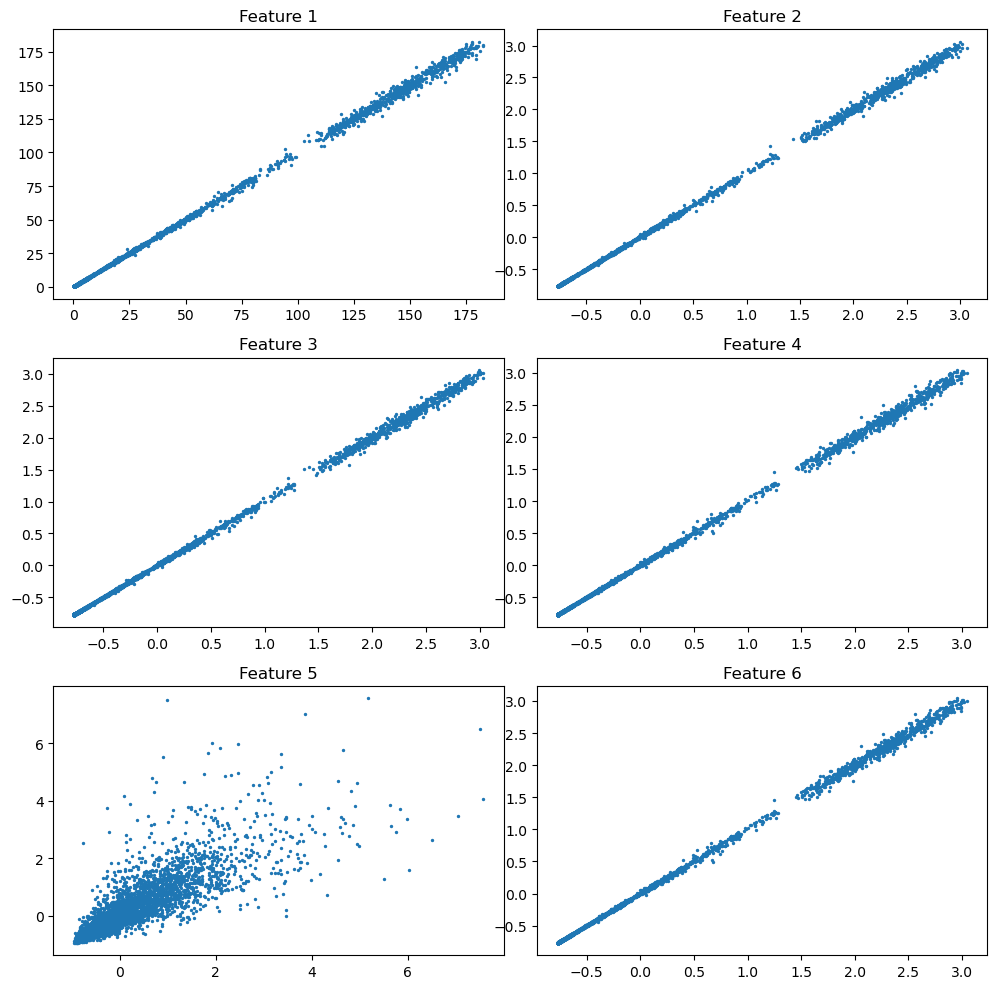

In [ ]:
# Plotting the 6 variables
fig, axes = plt.subplots(3, 2, figsize=(10, 10))  # 3 rows, 2 columns
axes = axes.flatten()

for i in range(6):
    axes[i].scatter(embedded_data[i, :, 0], embedded_data[i, :, 1], s=2)  # Plot the 2D projection for each feature
    axes[i].set_title(f'Feature {i+1}')
    # axes[i].set_xlabel('Dimension 1')
    # axes[i].set_ylabel('Dimension 2')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [93]:
embedded_data = embedded_data[None, :, :]
homology_dimensions = [0, 1, 2]
vr = VietorisRipsPersistence(homology_dimensions=homology_dimensions, n_jobs=-1)
diagram = vr.fit_transform_plot(embedded_data)

In [94]:
pl = PersistenceLandscape(n_layers=1)
features = pl.fit_transform_plot(diagram)

In [95]:
bc = BettiCurve()
features = bc.fit_transform_plot(diagram)

In [96]:
hk = HeatKernel()
features = hk.fit_transform_plot(diagram)

In [97]:
pi = PersistenceImage()
features = pi.fit_transform_plot(diagram)

In [98]:
s = Silhouette()
features = s.fit_transform_plot(diagram)

In [99]:
pe = PersistenceEntropy()
features = pe.fit_transform(diagram)
print(features)

a = Amplitude()
features = a.fit_transform(diagram)
print(features)

[[9.50647648 8.62987683 6.9450436 ]]
[[3.2872936  0.20564506 0.03968419]]
